<a href="https://colab.research.google.com/github/Hyerinrin/AI-Lesson/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%ED%99%9C%EC%9A%A9_%EA%B8%B0%EB%A7%90%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170508288/170498071 [==============================] - 13s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


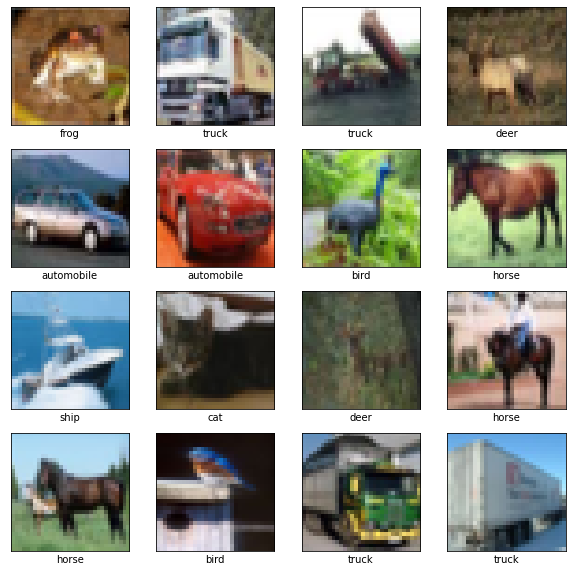

In [ ]:

# 문5)
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

#데이터 읽어오고 삽입
(x_train,y_train), (x_test,y_test)=cifar10.load_data()

#레이블
class_names=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

# 훈련 , 테스트 집합 크기 출력
print(x_train.shape)
print(x_test.shape)

# 샘플 테이터 출력 
plt.figure(figsize=(10,10))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [ ]:
# perceptron
# MLP
# CNN(LeNet-5)
# 성능 비교 & 성능 차이 원인 분석

In [ ]:
from sklearn.utils import validation
from sklearn.linear_model import Perceptron
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split

#Perceptron 이용

#데이터 읽고 훈련 집합과 테스트 집합으로 분할
(x_train,y_train), (x_test,y_test)=cifar10.load_data()

#fit 함수로 Perceptron 학습
p=Perceptron(max_iter=100, eta0=0.001,verbose=0,validation=True)
p.fit(x_train,y_train) #훈련집합 20%는 검증 셋으로

res=p.predict(x_test) #테스트 집합만 사용

#혼동 행렬
conf=np.zeros((10,10))
for i in range(len(res)):
  conf[res[i]][y_test[i]]+=1
print(conf)
#정확도
no_correct=0
for i in range(10):
  no_correct+=conf[i][i]
accuracy=no_correct/len(res)
print("정확률은: "+accuracy*100)

170508288/170498071 [==============================] - 4s 0us/step


TypeError: ignored

Epoch 1/30
391/391 - 17s - loss: 1.6512 - accuracy: 0.3917 - val_loss: 1.3192 - val_accuracy: 0.5284 - 17s/epoch - 42ms/step
Epoch 2/30
391/391 - 4s - loss: 1.3009 - accuracy: 0.5325 - val_loss: 1.1448 - val_accuracy: 0.5925 - 4s/epoch - 9ms/step
Epoch 3/30
391/391 - 4s - loss: 1.1485 - accuracy: 0.5919 - val_loss: 1.0254 - val_accuracy: 0.6340 - 4s/epoch - 9ms/step
Epoch 4/30
391/391 - 4s - loss: 1.0272 - accuracy: 0.6357 - val_loss: 0.9120 - val_accuracy: 0.6800 - 4s/epoch - 9ms/step
Epoch 5/30
391/391 - 4s - loss: 0.9322 - accuracy: 0.6701 - val_loss: 0.8756 - val_accuracy: 0.6919 - 4s/epoch - 9ms/step
Epoch 6/30
391/391 - 4s - loss: 0.8675 - accuracy: 0.6954 - val_loss: 0.7855 - val_accuracy: 0.7291 - 4s/epoch - 9ms/step
Epoch 7/30
391/391 - 4s - loss: 0.8149 - accuracy: 0.7129 - val_loss: 0.7561 - val_accuracy: 0.7353 - 4s/epoch - 10ms/step
Epoch 8/30
391/391 - 4s - loss: 0.7699 - accuracy: 0.7298 - val_loss: 0.7088 - val_accuracy: 0.7479 - 4s/epoch - 9ms/step
Epoch 9/30
391/391 -

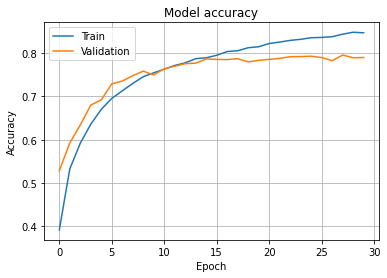

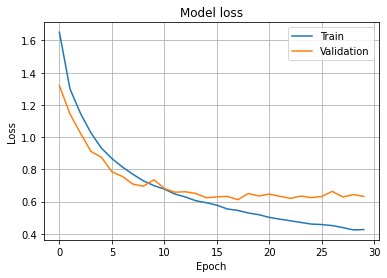

In [ ]:
#문5-3
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

#신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

#신경망 모델학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

#정확률
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

#정확률
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()
#손실함수
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()


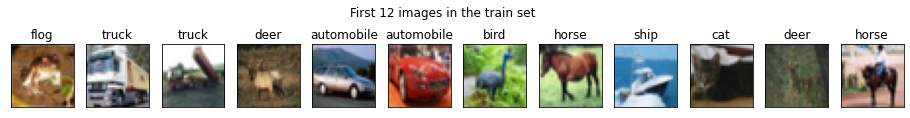

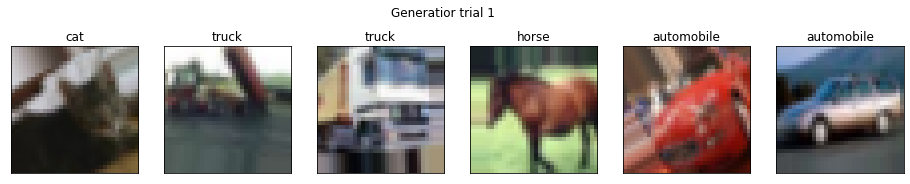

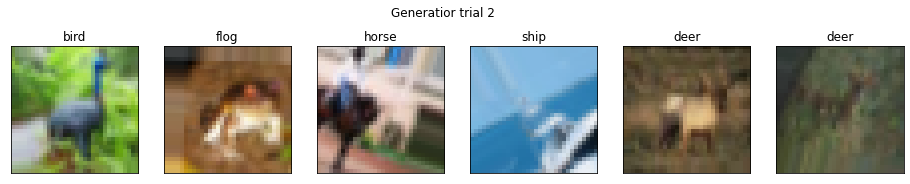

In [ ]:
#문5-4
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

#cifar-10의 부류 이름
class_names=['airplane','automobile','bird','cat','deer','dog','flog','horse','ship','truck']

#신경망 형태로 변환
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype('float32');x_train/=255
x_train=x_train[0:12,];y_train=y_train[0:12,] #앞 12개에만 증대 적용

#앞 12개 영상 보여줌
plt.figure(figsize=(16,2))
plt.suptitle("First 12 images in the train set")
for i in range(12):
  plt.subplot(1,12,i+1)
  plt.imshow(x_train[i])
  plt.xticks([]); plt.yticks([])
  plt.title(class_names[int(y_train[i])])

  #영상 증대기 생성
batch_siz=6
generator=ImageDataGenerator(rotation_range=30.0,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True)
gen=generator.flow(x_train,y_train,batch_size=batch_siz)

#첫 번째 증대
img,label=gen.next()
plt.figure(figsize=(16,3))
plt.suptitle("Generatior trial 1")
for i in range(batch_siz):
  plt.subplot(1,batch_siz,i+1)
  plt.imshow(img[i])
  plt.xticks([]);plt.yticks([])
  plt.title(class_names[int(label[i])])

#두 번째 증대
img,label=gen.next()
plt.figure(figsize=(16,3))
plt.suptitle("Generatior trial 2")
for i in range(batch_siz):
  plt.subplot(1,batch_siz,i+1)
  plt.imshow(img[i])
  plt.xticks([]);plt.yticks([])
  plt.title(class_names[int(label[i])])

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
#문6
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
import os

#데이터 삽입
train_folder='./CUB200/train'
test_folder='./CUB200/test'

class_reduce=0.1
no_class=int(len(os.listdir(train_folder))*class_reduce)
x_train,y_train=[],[]
for i,class_name in enumerate(os.listdir(train_folder)):
  if i<no_class:
    for fname in os.listdir(train_folder+'/'+class_name):
      img=image.load_img(train_folder+'/'+class_name+'/'+fname,target_size=(224,224))
      if len(img.getbands())!=3:
        print("주의:유효하지 않은 영상 발생",class_name,fname)
        continue
      x=image.img_to_array(img)
      x=preprocess_input(x)
      x_test.append(x)
      y_test.append(i)

x_train=np.asarray(x_train)
y_train=np.asarray(y_train)
x_test=np.asarray(x_test)
y_test=np.asarray(y_test)
y_train=tf.keras.utils.to_categorical(y_train,no_class)
y_test=tf.keras.utils.to_categorical(y_test,no_class)

base_model=ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3)) 
cnn=Sequential()
cnn.add(base_model)
cnn.add(Flatten())
cnn.add(Dense(1024,activation='relu'))
cnn.add(Dense(no_class,activation='softmax'))

cnn.compile(loss='categorical_crossentropy',optimizer=Adam(0.00002),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=16,epochs=10,validation_data=(x_test,y_test),verbose=1)

res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

FileNotFoundError: ignored

(358, 7, 4) (358, 4)
[[3772.93633533 3796.63728431 3824.16587937 3666.52401643]
 [3799.67854295 3773.44146075 3879.23118467 3753.80002246]
 [3811.61197937 3799.36702601 3840.04482307 3788.91849833]
 [3804.41917011 3806.69151279 3819.19435612 3759.40921647]
 [3782.66410112 3807.84575592 3818.69548135 3766.24204823]
 [3689.86289319 3783.35506344 3804.35361623 3663.47774336]
 [3832.08088473 3701.04987103 3866.71870424 3688.69715385]] [3848.95636968 3832.59242908 3881.96576977 3802.51605364]
Epoch 1/200
250/250 - 3s - loss: 1322.4318 - mae: 1322.4318 - val_loss: 741.9388 - val_mae: 741.9388 - 3s/epoch - 10ms/step
Epoch 2/200
250/250 - 2s - loss: 558.3558 - mae: 558.3558 - val_loss: 459.3802 - val_mae: 459.3802 - 2s/epoch - 7ms/step
Epoch 3/200
250/250 - 2s - loss: 559.5358 - mae: 559.5358 - val_loss: 352.9671 - val_mae: 352.9671 - 2s/epoch - 7ms/step
Epoch 4/200
250/250 - 2s - loss: 503.4180 - mae: 503.4180 - val_loss: 356.7071 - val_mae: 356.7071 - 2s/epoch - 7ms/step
Epoch 5/200
250/250 

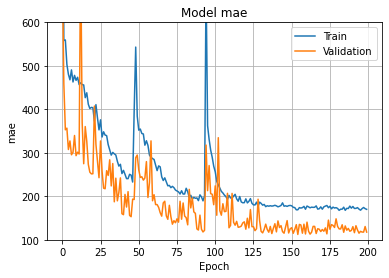

In [ ]:
#문7
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM,Dropout

#다운로드한 1년치 비트코인 가격 데이터 읽기
f=open('BTC_USD_2019-02-28_2020-02-27-CoinDesk.csv','r')
coindesk_data=pd.read_csv(f,header=0)
seq=coindesk_data[['Closing Price (USD)','24h Open (USD)','24h High (USD)','24h Low (USD)']].to_numpy()
#print('데이터 길이:',len(seq),'\n앞쪽 5개 값:',seq[0:5])

# #그래프로 확인
# plt.plot(seq,color='red')
# plt.title('Bitcoin Prices (1 year from 2019-02-28)')
# plt.xlabel('Days');plt.ylabel('Price in USD')
# plt.show()

#시계열 데이터를 윈도우 단위로 자르는 함수
def seq2dataset(seq,window,horizon):
  X=[]; Y=[]
  for i in range(len(seq)-(window+horizon)+1):
    x=seq[i:(i+window)]
    y=(seq[i+window+horizon-1])
    X.append(x); Y.append(y)
  return np.array(X), np.array(Y)

w=7
h=1

X,Y = seq2dataset(seq,w,h)
print(X.shape,Y.shape)
print(X[0],Y[0])

#훈련 집합과 테스트 집합으로 분할
split=int(len(X)*0.7)
x_train=X[0:split]; y_train=Y[0:split]
x_test=X[split:]; y_test=Y[split:]

#LSTM 모델 설계와 학습
model = Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(4))
model.compile(loss='mae', optimizer='adam',metrics=['mae'])
hist=model.fit(x_train,y_train,epochs=200,batch_size=1,validation_data=(x_test,y_test),verbose=2)

#LSTM 모델 평가
ev=model.evaluate(x_test,y_test,verbose=0)
print("손실 함수:",ev[0], "MAE:",ev[1])

#예측수행
pred=model.predict(x_test)
print("평균절댓값오차(MAE):",sum(abs(y_test-pred))/len(x_test))
print("평균절댓값백분율오차(MAPE):",sum(abs(y_test-pred)/y_test)/len(x_test))

#학습곡선
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.ylim([100,600])
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

# #예측결과 시각화
# x_range=range(len(y_test))
# plt.plot(x_range,y_test[x_range],color='red')
# plt.plot(x_range,pred[x_range],color='blue')
# plt.legend(['True prices', 'Predicted prices'], loc='best')
# plt.grid()
# plt.show()

# #일부 구간 확대
# x_range=range(50,64)
# plt.plot(x_range,y_test[x_range],color='red')
# plt.plot(x_range,pred[x_range], color='blue')
# plt.legend(['True prices', 'Predicted prices'],loc='best')
# plt.grid()
# plt.show()